In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer,KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,root_mean_squared_error
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression,LinearRegression   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'titanic.csv',encoding='utf8',usecols=['Fare','Age','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.shape


(714, 3)

In [50]:
x= df.iloc[:,[1,2]]
y=df.iloc[:,0
          ]

In [51]:
x.shape,y.shape

((714, 2), (714,))

In [72]:
x_train, x_test, y_train, y_test =train_test_split(x,y,train_size=0.8,random_state=2)

In [73]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((571, 2), (143, 2), (571,), (143,))

In [74]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=2
)


In [75]:
y_train.shape,y_test.shape

((571,), (143,))

In [76]:

clf = DecisionTreeClassifier()

In [80]:
clf.fit(x_train,y_train)

y_pred= clf.predict(x_test)

print("decision tree ",accuracy_score(y_test,y_pred))

decision tree  0.6573426573426573


#### cross validation

In [79]:
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

np.float64(0.6246870109546165)

#### BINING AND BINARIZATION

#### KBIN age and KBIN fare

In [78]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [16]:
bining = ColumnTransformer([
    
    
    ('kbin_age',kbin_age,[0]),
    ('kbin_fare',kbin_fare,[1])
    
    ],remainder='passthrough')

In [17]:
# bining.named_transformers_['kbin_fare'].n_bins_


In [82]:
# bining.named_transformers_['kbin_fare'].bin_edges_

In [83]:
x_train_trf = bining.fit_transform(x_train)
x_test_trf= bining.transform(x_test)



de = DecisionTreeClassifier()

de.fit(x_train_trf,y_train)

y_pred =de.predict(x_test_trf)

print("transform ", accuracy_score(y_test,y_pred))

transform  0.7132867132867133


In [84]:
x_cross = bining.fit_transform(x)

de= DecisionTreeClassifier()

np.mean(cross_val_score(de,x_cross,y,scoring='accuracy',cv=10))

np.float64(0.682140062597809)

In [85]:
x_train_trf

array([[7., 8.],
       [0., 7.],
       [7., 9.],
       ...,
       [2., 5.],
       [4., 4.],
       [3., 0.]], shape=(571, 2))

In [86]:

pd.DataFrame({
    'age':x_train['Age'],
    'age_trans':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trans':x_train_trf[:,1]
    
    
    
    
})

,age,age_trans,fare,fare_trans
3,35.0,7.0,53.1000,8.0
541,9.0,0.0,31.2750,7.0
679,36.0,7.0,512.3292,9.0
14,14.0,1.0,7.8542,1.0
238,19.0,2.0,10.5000,3.0
...,...,...,...,...
676,24.5,3.0,8.0500,2.0
734,23.0,3.0,13.0000,4.0
624,21.0,2.0,16.1000,5.0
666,25.0,4.0,13.0000,4.0



#### function to plot

In [87]:
def dist(bins,strategy):

#! kbin 
    kbin_age=KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    kbin_fare=KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    
#^ columunar transform   
    clf = ColumnTransformer([
        
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
        
        ])
    
    
#* cross validation 
    x_c = clf.fit_transform(x)
    xs= np.mean(cross_val_score(DecisionTreeClassifier(),x,y,scoring='accuracy',cv=10))
    print(xs)
    
    
#! ploting is here

    fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(8,3))
    sns.histplot(x['Age'],ax=ax1,kde=True,color="#000000")
    ax1.set_title("before")
    
    
    plt.hist(x_c[:,0],color="#FF0202",edgecolor='#0C0A09')
    ax2.set_title("after")
    plt.show()
    
    
    
    
    fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(8,3))
    sns.histplot(x['Fare'],ax=ax1,kde=True,color="#00B374")
    ax1.set_title("before")
    
    
    plt.hist(x_c[:,1],color="#FF04EA",edgecolor='black')
    ax2.set_title("after")
    plt.show()
    
    
    
    

0.6302816901408451


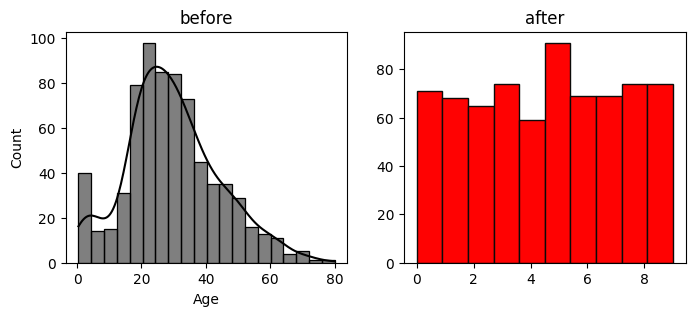

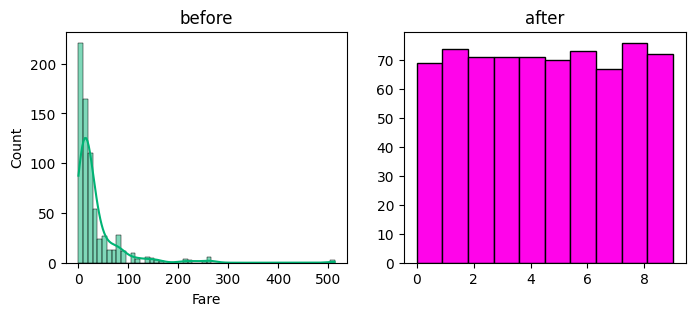

In [88]:
dist(10,'quantile')

0.6317292644757433


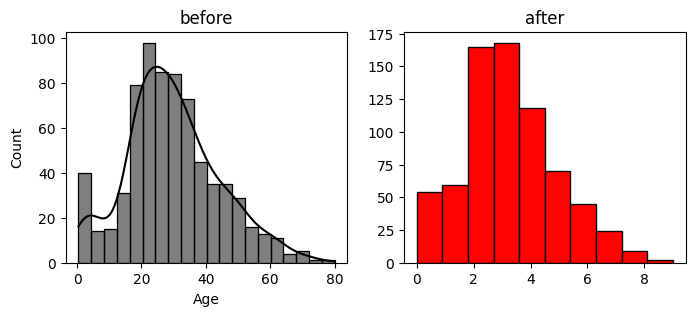

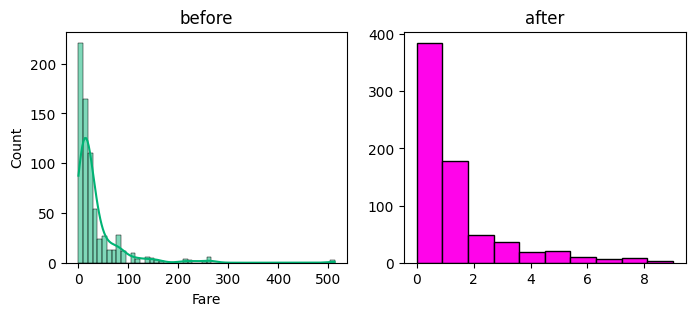

In [89]:
dist(10,'kmeans')

0.6317488262910798


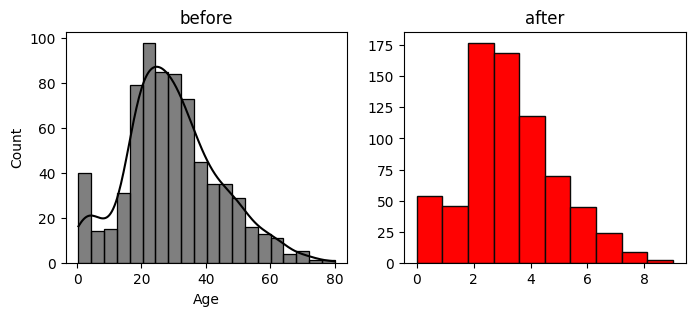

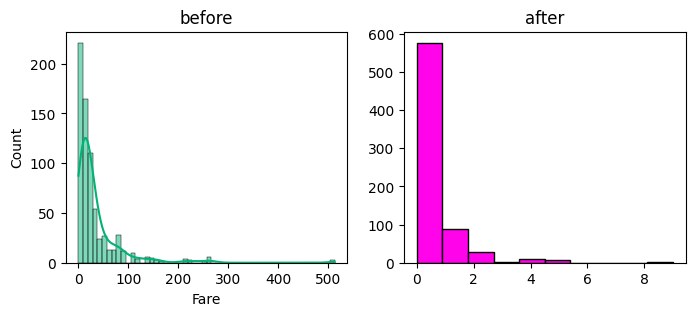

In [90]:
dist(10,'uniform')

In [91]:
# cross validation 







kbin_age=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
kbin_fare=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

clf = ColumnTransformer([
    
('first',kbin_age,[0]),
('second',kbin_fare,[1])
    
    ])
    
x_c = clf.fit_transform(x)
de=DecisionTreeClassifier()
np.mean(cross_val_score(de,x_c,y,scoring='accuracy',cv=10))

np.float64(0.682140062597809)

#### tip  data set binning 

In [92]:
tips =sns.load_dataset('tips')

In [93]:
tips.drop(columns=['sex','smoker','day','time'],inplace=True)

In [94]:
tips

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [95]:
X= tips.iloc[:,[0,1]]
Y= tips.iloc[:,2]

In [96]:
X.shape,Y.shape

((244, 2), (244,))

In [101]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2,random_state=42)

In [102]:
x_test.shape,x_train.shape

((49, 2), (195, 2))

In [103]:
de= DecisionTreeClassifier()


de.fit(x_train,y_train)

Y_pred = de.predict(x_test)

print("accuracy_score",accuracy_score(y_test,Y_pred))

accuracy_score 0.5102040816326531


#### cross validtion

In [104]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,scoring='accuracy',cv=10))

np.float64(0.5613333333333335)

#### now dow colusion


In [105]:
x_train

,total_bill,tip
228,13.28,2.72
208,24.27,2.03
96,27.28,4.00
167,31.71,4.50
84,15.98,2.03
...,...,...
106,20.49,4.06
14,14.83,3.02
92,5.75,1.00
179,34.63,3.55


In [106]:
def p(bins,str):
    kbin_total =KBinsDiscretizer(n_bins=bins,strategy=str,encode='ordinal')
    kbin_tip =KBinsDiscretizer(n_bins=bins,strategy=str,encode='ordinal')
    
    
    clf = ColumnTransformer([
     ('first',kbin_total,[0]),
     ('second',kbin_tip,[1])
        
        
    ],remainder='passthrough')
    
    #cross validation
    x_c = clf.fit_transform(X)
    ss = np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,scoring='accuracy',cv=10))
    print(ss)
    
    
    fig, (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(15,3.1))
    
    sns.histplot(X['total_bill'],ax=ax1,kde=True,color='yellow')
    ax1.set_title("before")
    
    sns.histplot(x_c[:,0],kde=True,color='red',ax=ax2)
    
    sns.histplot(X['tip'],ax=ax3,kde=True,color='yellow')
    ax3.set_title("tip before")
    
    sns.histplot(x_c[:,1],kde=True,color='red',ax=ax4)
    ax4.set_title("after")
    
    
    
    
    
    


0.5493333333333335


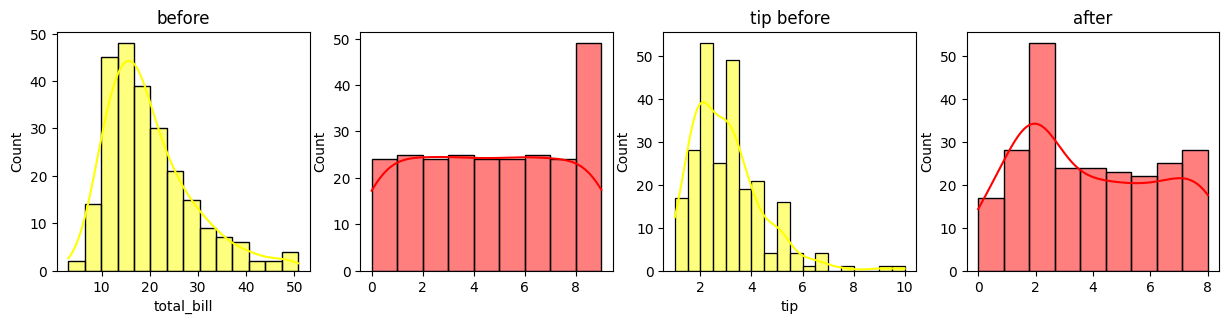

In [109]:
p(10,'quantile')

0.5613333333333334


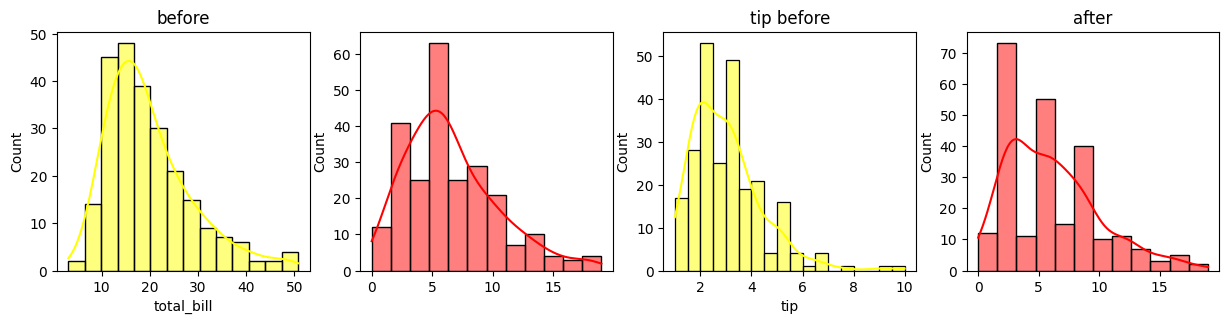

In [110]:
p(20,'kmeans')